In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
import skimage
import scipy
import sklearn
from skimage import data
from skimage import filters
from skimage import io
from skimage import img_as_float
import os

(2, 400)


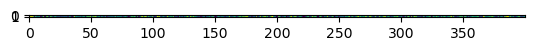

In [6]:
n = 20
l = 256
im = np.zeros((l, l))
points = l * np.random.random((2, n ** 2))
print(points.shape)

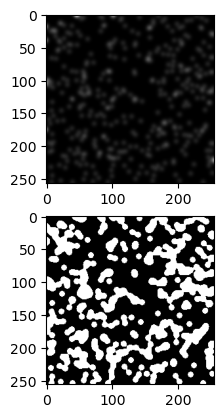

In [4]:
im[(points[0]).astype(np.uint8), (points[1]).astype(np.uint8)] = 1
im = filters.gaussian(im, sigma=l / (4. * n))
blobs = im > im.mean()
fig, axs = plt.subplots(2)
axs[0].imshow(im, cmap = 'gray')
axs[1].imshow(blobs, cmap = 'gray')

80 80


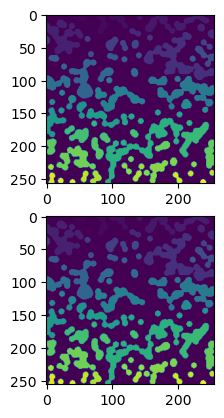

In [5]:
from skimage import measure
all_labels = measure.label(blobs)
#Label only foreground connected components
blobs_labels = measure.label(blobs, background=0)
print(all_labels.max(), blobs_labels.max())
fig, axs = plt.subplots(2)
axs[0].imshow(all_labels)
axs[1].imshow(blobs_labels)

In [7]:
x, y = np.indices((8, 8))
x

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3, 3, 3, 3],
       [4, 4, 4, 4, 4, 4, 4, 4],
       [5, 5, 5, 5, 5, 5, 5, 5],
       [6, 6, 6, 6, 6, 6, 6, 6],
       [7, 7, 7, 7, 7, 7, 7, 7]])

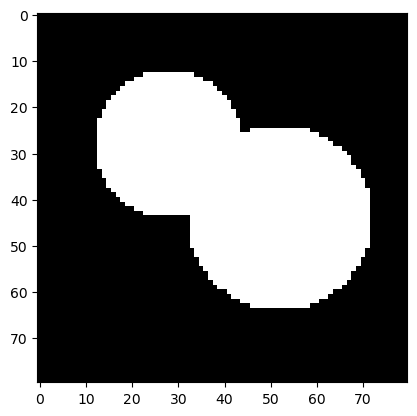

In [8]:
from skimage.segmentation import watershed
from skimage.morphology import remove_small_objects
from skimage.feature import peak_local_max

# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1) ** 2 + (y - y1) ** 2 < r1 ** 2
mask_circle2 = (x - x2) ** 2 + (y - y2) ** 2 < r2 ** 2
image = np.logical_or(mask_circle1, mask_circle2)
plt.imshow(image, cmap = 'gray')

(80, 80) float64 20.0


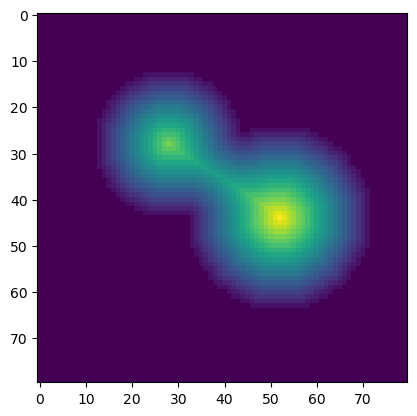

In [9]:
from scipy import ndimage
distance = ndimage.distance_transform_edt(image)
print(distance.shape, distance.dtype, distance.max())
plt.imshow(distance)

In [ ]:
#?peak_local_max
local_maxi = peak_local_max(distance, indices = False, footprint=np.ones((3, 3)), labels=image)
local_maxi
plt.imshow(local_maxi)

In [ ]:
#?skimage.morphology.label
markers = skimage.morphology.label(local_maxi)
markers

In [ ]:
labels_ws = watershed(-distance, markers, mask=image)
print(labels_ws.shape, labels_ws.max())
plt.imshow(labels_ws)

In [ ]:
?skimage.morphology.remove_small_objects

In [ ]:
coins = data.coins()
print(coins.dtype, coins.shape)
print(coins.max(), coins.min())
plt.imshow(coins, cmap = 'gray')

In [ ]:
val = filters.threshold_otsu(coins)
mask = coins > val
plt.imshow(mask, cmap = 'gray')

In [ ]:
clean_border = skimage.segmentation.clear_border(mask)
plt.imshow(clean_border, cmap = 'gray')

In [ ]:
remove_small = remove_small_objects(clean_border)
plt.imshow(remove_small, cmap = 'gray')

In [ ]:
closed = skimage.morphology.closing(remove_small, skimage.morphology.square(5))
plt.imshow(closed)

In [ ]:
distance = ndimage.distance_transform_edt(closed)
print(distance.shape, distance.dtype, distance.max())
plt.imshow(distance)

In [ ]:
?peak_local_max


In [ ]:
local_maxi = peak_local_max(distance, indices = False, footprint=np.ones((15, 15)), labels=closed)
print(local_maxi.shape, local_maxi.dtype, local_maxi.max())
local_maxi
plt.imshow(local_maxi)

In [ ]:
markers = skimage.morphology.label(local_maxi) #connected component labeling
print(markers.shape, markers.dtype, markers.max())

labels_ws = skimage.segmentation.watershed(-distance, markers, mask=closed)
print(labels_ws.shape, labels_ws.max())
plt.imshow(labels_ws)
